# Covid 19 data analysis
This notebook contains Python code that perform exploratory data analysis (EDA) using Pandas

### Requirements
- Python 3.7 or below. (3.8+ does not work at this point with Apache Spark).
- Pandas

*** 14 June 2021: Good to demonstrate ***

In [1]:
import pydoop.hdfs as hd
import pandas as pd

In [2]:
covid_data_dir='/user/student/csse_covid_19_data/'
covid_data_daily_reports_dir=covid_data_dir + 'csse_covid_19_daily_reports/'
covid_data_daily_file=covid_data_daily_reports_dir + '/06-07-2020.csv'

In [3]:
with hd.open(covid_data_daily_file) as f:
    pd_daily =  pd.read_csv(f)

pd_daily

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-08 03:33:22,34.223334,-82.461707,51,0,0,51,"Abbeville, South Carolina, US",207.934113,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-08 03:33:22,30.295065,-92.414197,502,28,0,474,"Acadia, Louisiana, US",809.090176,5.577689
2,51001.0,Accomack,Virginia,US,2020-06-08 03:33:22,37.767072,-75.632346,983,13,0,970,"Accomack, Virginia, US",3001.609110,1.340206
3,16001.0,Ada,Idaho,US,2020-06-08 03:33:22,43.452658,-116.241552,838,22,0,816,"Ada, Idaho, US",174.008019,2.625298
4,19001.0,Adair,Iowa,US,2020-06-08 03:33:22,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US",125.838926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,NaN,NaN,NaN,Zambia,2020-06-08 03:33:22,-13.133897,27.849332,1089,7,912,170,Zambia,5.923643,0.642792
3673,NaN,NaN,NaN,Zimbabwe,2020-06-08 03:33:22,-19.015438,29.154857,282,4,34,244,Zimbabwe,1.897338,1.418440
3674,2066.0,Copper River,Alaska,US,2021-04-02 15:13:53,60.388600,-162.890520,0,0,0,0,"Copper River, Alaska, US",NaN,NaN
3675,2063.0,Chugach,Alaska,US,2021-04-02 15:13:53,61.166660,-149.900000,13,0,0,0,"Chugach, Alaska, US",NaN,NaN


In [21]:
pd_confirmed = pd_daily.groupby(['Country_Region'])['Confirmed'].sum()
pd_deaths = pd_daily.groupby(['Country_Region'])['Deaths'].sum()
pd_recovered = pd_daily.groupby(['Country_Region'])['Recovered'].sum()
# pd_confirmed.columns=['Country_Region','Confirmed']

In [22]:
# sorted_pd_confirmed = pd_confirmed.sort_values(by=['Confirmed'], ascending=False)
pd_confirmed.columns=['Country_Region','Confirmed']
pd_confirmed
sorted_pd_confirmed = pd_confirmed.sort_values()

/home/student/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Country_Region'>

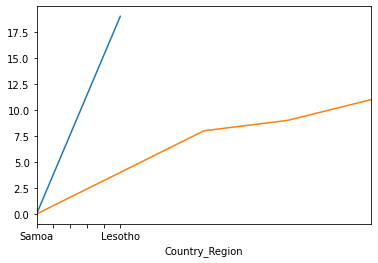

In [23]:
sorted_pd_confirmed.take([0,10]).plot()
sorted_pd_confirmed.head().plot()

In [24]:
sorted_pd_confirmed.head()

Country_Region
Samoa                0
Lesotho              4
Papua New Guinea     8
MS Zaandam           9
Seychelles          11
Name: Confirmed, dtype: int64

In [25]:
len(pd_deaths), len(pd_confirmed), len(pd_recovered)

(188, 188, 188)

In [34]:
pd_daily_stats = pd_confirmed.copy()
# pd_daily_stats['Deaths'] = pd_deaths['Deaths']
# pd_daily_stats['Recovered'] = pd_recovered['Recovered']

In [35]:
pd_daily_stats_sorted_by_confirmed = pd_daily_stats.sort_values(ascending=False)

In [36]:
pd_daily_stats_sorted_by_confirmed.head()

Country_Region
US                1946405
Brazil             691758
Russia             467073
United Kingdom     287621
India              257486
Name: Confirmed, dtype: int64